1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Поиск и устранение редких и выбивающихся значений](#search)
4. [Добавление цены одного квадратного метра](#new_m)  
5. [Добавление дня недели публикации объявления](#new_d)
6. [Добавление месяца недели публикации объявления](#new_mon)
7. [Добавление года недели публикации объявления](#new_y)
8. [Добавление типа этажа квартиры](#new_f)
9. [Добавление расстояния до центра города в километрах](#new_way)
10. [Исследовательский анализ данных](#reseach)
11. [Изучение быстроты продажи квартиры](#sell)
12. [Определение степени влияния различных факторов на стоимость квартиры](#fact)
13. [Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений](#check)
14. [Подсчет средней цены одного киллометра до центра Санкт-Петербурга](#check_1)
15. [Общий вывод](#done)

## Открытие данных <a id="start"></a> 

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# загрузка данных
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

## Предобработка данных <a id="preprocessing"></a> 

In [3]:
# функция для предобработки данных
def data_preprocessing(data):
    # приведение наименования столбцов датафрейма к правильному виду
    data.columns = [x.lower().replace(' ', '_') for x in data.columns]
    print('Вывод первых 10 строчек датафрейма на экран')  
    display(data.head(10))
    print(' ')   
    print('Вывод основной информации о датафрейме с помощью метода info()') 
    display(data.info())
    print(' ') 
    print('Вывод количества пропущенных значений для каждого столбца датафрейма')
    display(data.isna().sum())
    print(' ') 
    print('Вывод количества пропущенных значений в процентах')
    display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))
    print(' ')
    print('Подсчёт количества явных дубликатов')
    display(data.duplicated().sum())
    print('Общая гистограмма для всех числовых столбцов')
    data.hist(figsize=(15, 20))
    plt.show()

Вывод первых 10 строчек датафрейма на экран


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 
Вывод основной информации о датафрейме с помощью метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  local

None

 
Вывод количества пропущенных значений для каждого столбца датафрейма


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

 
Вывод количества пропущенных значений в процентах


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


 
Подсчёт количества явных дубликатов


0

Общая гистограмма для всех числовых столбцов


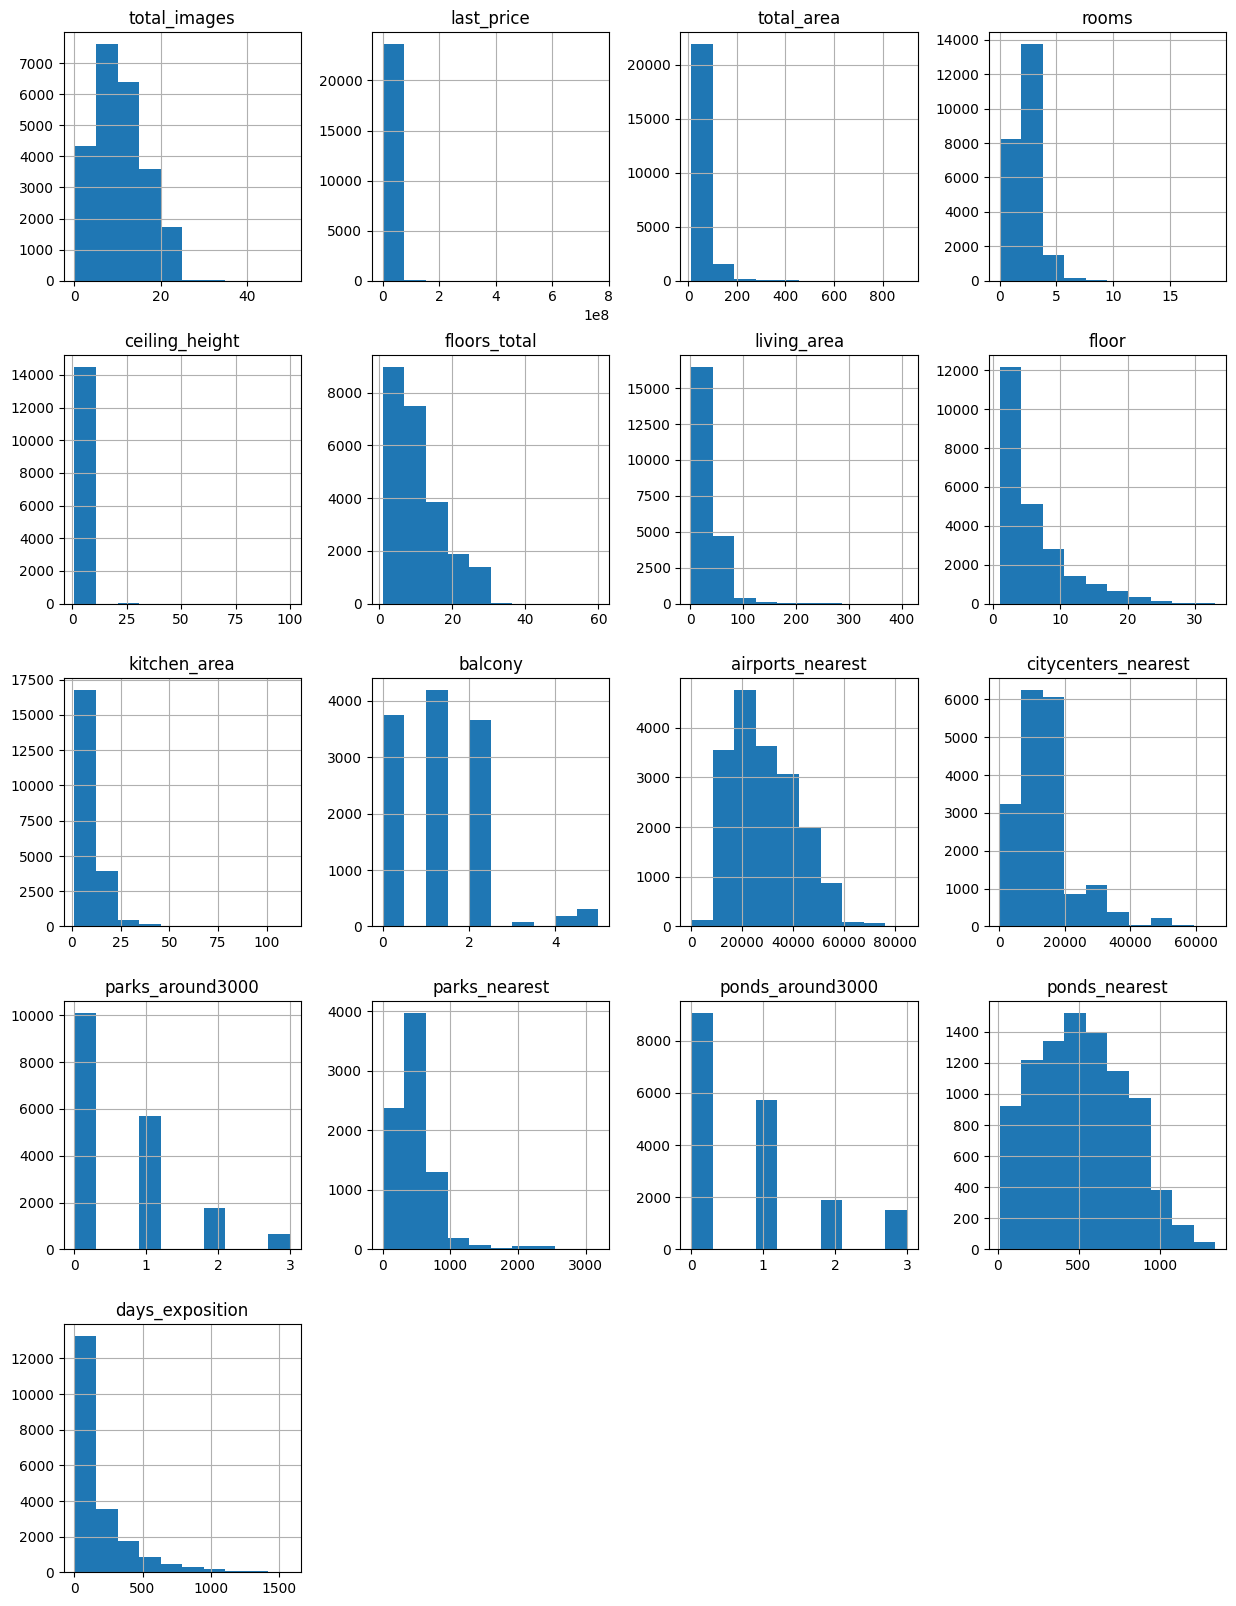

In [4]:
data_preprocessing(data)

**Вывод**   
Выявлено большое количество пропусков из всего количества данных:  
1) ceiling_height (высота потолков), floors_total (всего этажей в доме), living_area (жилая площадь в квадратных метрах), locality_name (название населённого пункта), cityCenters_nearest (расстояние до центра города), parks_nearest (расстояние до ближайшего парка), ponds_nearest (расстояние до ближайшего водоёма) - данные, скорее всего, просто не заполнили, данные пропуски невозможно заменить на 0, поэтому оставим значения пустыми;  
2) is_apartment (апартаменты) - значения могли пропустить там, где помещение не является апартаментом, заполним значением False;   
3) kitchen_area (площадь кухни в квадратных метрах) - это может быть студия;  
4) balcony (число балконов) - значения могли пропустить там, где нет балконов, заполним значением 0;  
5) airports_nearest (расстояние до ближайшего аэропорта) - данные могли не заполнить из-за отсутствия аэропорта рядом или же значения просто пропустили, лучше оставим значения пустыми, потому что ситуация может быть и та и та;  
6) parks_around3000 (число парков в радиусе 3 км) - данные могли не заполнить из-за отсутствия парка рядом, заменить на 0 можно;  
7) ponds_around3000 (число водоёмов в радиусе 3 км) - данные могли не заполнить из-за отсутствия водоёмов рядом, заменить на 0 можно.    

На основании процентного количества пропусков можно сделать вывод, что наибольшую долю пропусков занимает колонка 'is_apartment' (88%), средний процент пропусков определен в колонке 'parks_nearest', 'ponds_nearest': 66% и 62% соответственно. Наименьшее количество пропусков выявлено в колонке 'living_area' (8%).  
  
Необходимо изменить тип данных в столбцах:  
1) first_day_exposition - необходим тип данных для работы с датами;   
2) floors_total, balcony, parks_around, ponds_around - не может быть не целым числом;  
3) is_apartment - значения False and True, соответственно лучше представить данные в bool;  
4) last_price - можно заменить на целочисленный тип, поскольку все значения по сути целые, значений после разделителя "." нет.

In [5]:
# заполнение пропущенных значений
data['is_apartment'] = data['is_apartment'].fillna('False') # помещение не является апартаментом - False
data['balcony'] = data['balcony'].fillna(0) # нет балконов - 0
data['parks_around3000'] = data['parks_around3000'].fillna(0) # число парков - 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # число водоёмов - 0

In [6]:
# приведение наименования столбцов к правильному виду
data = data.rename(
                    columns={'citycenters_nearest' : 'city_centers_nearest',\
                             'ponds_around3000' : 'ponds_around',\
                             'parks_around3000' : 'parks_around'}
)

In [7]:
# количество пропущенных значений очень мало, удаление не повредит исследованию
data = data.dropna(subset=['floors_total','locality_name'])

In [8]:
# изменение типа данных в столбцах, используя обработку ошибок при приобразовании

try:
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
    data['floors_total'] = data['floors_total'].astype('int64')
    data['balcony'] = data['balcony'].astype('int64')
    data['parks_around'] = data['parks_around'].astype('int64')
    data['ponds_around'] = data['ponds_around'].astype('int64')
    data['is_apartment'] = data['is_apartment'].astype('bool')
    data['last_price'] = data['last_price'].astype('int64')
except:
    print('Ошибка')  

In [9]:
# изучение уникальных значений для выявления неявных дубликатов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [10]:
# приведение значения к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

# заменяем ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

# замена "городской поселок" на "поселок городского типа"
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

In [11]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок') # приведем все значения к "поселок"
data['locality_name'] = data['locality_name'].str.replace('поселок','поселок городского типа') # приведем все значения к "поселок городского типа"

## Поиск и устранение редких и выбивающихся значений <a id="search"></a> 

In [12]:
# поиск редких и выбивающихся значений
data.describe() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2017-11-10 08:59:53.125398016,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,2018-08-26 00:00:00,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.681156,1.091093e+07,35.657060,NaN,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782


In [13]:
# подсчет количества квартир с аномально низкой высотой потолков
data.query('ceiling_height < 2.5')['ceiling_height'].count()

73

In [14]:
# определение показателей с аномально низкой высотой потолков
data.query('ceiling_height < 2.5').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
193,6,7920000,83.8,2017-08-17,4,2.47,9,55.9,9,True,...,9.8,1,санкт-петербург,30352.0,7724.0,0,NaN,1,289.0,155.0
227,13,2200000,47.0,2018-01-12,3,2.34,5,NaN,1,True,...,NaN,0,поселок городского типа новый свет,NaN,NaN,0,NaN,0,NaN,45.0
552,11,2999000,33.5,2017-03-30,1,2.00,15,17.5,6,True,...,6.5,0,санкт-петербург,33972.0,11746.0,1,520.0,1,949.0,270.0
632,20,3350000,35.0,2017-11-14,2,2.45,9,21.0,9,False,...,6.0,2,поселок городского типа кузьмоловский,NaN,NaN,0,NaN,0,NaN,NaN
987,12,7100000,65.5,2016-03-30,4,2.46,5,51.0,4,True,...,9.4,0,санкт-петербург,24542.0,5110.0,1,572.0,0,NaN,82.0
1078,8,5450000,59.5,2018-05-07,3,2.45,9,38.4,6,True,...,5.7,2,санкт-петербург,45341.0,16603.0,1,675.0,0,NaN,173.0
1322,16,6000000,55.0,2019-04-11,3,2.40,5,30.0,1,False,...,15.0,0,пушкин,14234.0,26388.0,0,NaN,0,NaN,NaN
1582,4,4100000,45.6,2016-01-13,2,2.30,9,28.4,8,False,...,7.0,2,санкт-петербург,49152.0,14977.0,1,489.0,1,525.0,329.0
1677,3,2990000,36.1,2018-04-26,1,2.48,12,18.3,4,True,...,7.0,1,кронштадт,65224.0,46949.0,1,631.0,1,452.0,133.0
2236,2,2400000,63.6,2018-03-21,4,2.40,5,49.0,2,True,...,8.0,1,новая ладога,NaN,NaN,0,NaN,0,NaN,45.0


In [15]:
# подсчет количества квартир с аномально высокой высотой потолков, которые могут иметь вещественные значения
data.query('ceiling_height >= 25')['ceiling_height'].count()

20

In [16]:
# определение показателей с аномально высокой высотой потолков, которые могут иметь вещественные значения
data.query('ceiling_height >= 25').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,NaN,2,гатчина,NaN,NaN,0,NaN,0,NaN,259.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,True,...,8.0,0,волхов,NaN,NaN,0,NaN,0,NaN,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,True,...,7.0,1,санкт-петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,True,...,NaN,2,поселок городского типа мурино,NaN,NaN,0,NaN,0,NaN,28.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,True,...,9.0,2,деревня мины,NaN,NaN,0,NaN,0,NaN,540.0
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,True,...,7.0,2,санкт-петербург,28981.0,10912.0,1,305.0,0,NaN,267.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,True,...,12.0,5,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
6246,6,3300000,44.4,2019-03-25,2,25.0,5,31.3,5,True,...,5.7,0,кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN
9379,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,True,...,5.2,0,санкт-петербург,11647.0,13581.0,0,NaN,0,NaN,NaN
10773,8,3800000,58.0,2017-10-13,2,27.0,10,30.1,3,False,...,8.1,2,поселок городского типа мурино,NaN,NaN,0,NaN,0,NaN,71.0


In [17]:
# подсчет количества квартир с аномально высокой высотой потолков
data.query('ceiling_height > 4 and ceiling_height < 25')['ceiling_height'].count()

55

In [18]:
# определение показателей с аномально высокой высотой потолков
data.query('ceiling_height > 4 and ceiling_height < 25').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
154,1,8200000,80.0,2018-11-06,3,4.15,3,44.2,2,True,...,12.2,0,санкт-петербург,20562.0,3167.0,2,344.0,1,838.0,38.0
464,15,66571000,280.3,2015-06-11,6,5.20,8,159.5,7,True,...,21.1,0,санкт-петербург,26316.0,6655.0,3,187.0,1,616.0,578.0
1026,20,155000000,310.0,2018-10-12,5,5.30,3,190.0,3,True,...,63.0,2,санкт-петербург,24899.0,4785.0,0,NaN,1,603.0,NaN
1053,13,550000,29.0,2018-02-01,1,5.00,3,NaN,1,False,...,NaN,0,бокситогорск,NaN,NaN,0,NaN,0,NaN,6.0
1129,20,6695000,36.9,2018-09-28,1,4.06,5,22.0,2,True,...,7.2,0,санкт-петербург,21725.0,2990.0,1,596.0,1,866.0,110.0
1300,14,120000000,280.0,2018-07-12,5,4.70,4,162.0,3,True,...,30.0,0,санкт-петербург,24680.0,4247.0,1,464.0,3,339.0,225.0
1388,20,59800000,399.0,2015-01-21,5,5.60,6,NaN,6,True,...,NaN,0,санкт-петербург,26204.0,6934.0,2,149.0,2,577.0,719.0
2639,17,4850000,59.7,2017-11-18,3,4.19,5,46.3,4,True,...,6.4,1,санкт-петербург,42964.0,15468.0,0,NaN,0,NaN,60.0
2802,7,14950000,50.0,2016-03-06,2,4.80,3,30.0,2,True,...,10.0,0,санкт-петербург,24433.0,1725.0,1,589.0,3,161.0,160.0
2823,8,2700000,39.0,2018-02-01,1,4.50,6,18.3,6,True,...,8.4,0,поселок городского типа токсово,NaN,NaN,0,NaN,0,NaN,NaN


In [19]:
# подсчет количества квартир с нулевым количеством комнат
data.query('rooms == 0')['rooms'].count()

194

In [20]:
# определение показателей с нулевым количеством комнат
data.query('rooms == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,NaN,24,15.50,2,True,...,NaN,2,поселок городского типа мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000,25.00,2017-09-27,0,NaN,14,17.00,1,True,...,NaN,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000,27.11,2018-03-12,0,NaN,17,24.75,4,True,...,NaN,2,санкт-петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000,34.40,2017-03-28,0,NaN,26,24.30,19,True,...,NaN,1,поселок городского типа парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000,25.00,2019-02-20,0,NaN,10,NaN,7,True,...,NaN,0,поселок городского типа шушары,NaN,NaN,0,NaN,0,NaN,29.0
697,12,2500000,24.10,2017-12-01,0,2.75,25,17.50,21,True,...,NaN,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,201.0
716,5,1500000,17.00,2017-06-07,0,2.70,9,12.00,1,True,...,NaN,0,поселок городского типа шушары,18654.0,29846.0,0,NaN,0,NaN,40.0
780,9,2600000,26.10,2018-02-20,0,NaN,18,NaN,8,True,...,NaN,1,поселок городского типа мурино,NaN,NaN,0,NaN,0,NaN,45.0
839,14,1900000,35.00,2017-04-14,0,2.70,5,15.00,3,False,...,NaN,1,поселок городского типа новый свет,NaN,NaN,0,NaN,0,NaN,7.0
946,5,2200000,23.00,2016-09-27,0,NaN,27,18.00,7,True,...,NaN,2,поселок городского типа мурино,NaN,NaN,0,NaN,0,NaN,483.0


**Вывод**  
Все значения kitchen_area незаполнены, значения total_area невелики, таким образом можно сделать вывод, что это студии. Также можно заметить, что незаполненные значения kitchen_area присущи только студиям, таким образом пропущенные значения можно заменить на 0.

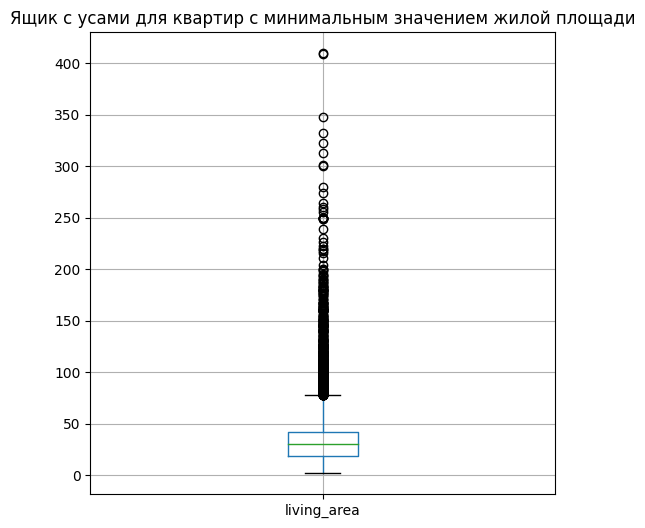

In [21]:
# отображение диаграммы ящик с усами для квартир с минимальным значением жилой площади
data.boxplot(column='living_area', figsize=(6, 6), grid=True)
plt.title('Ящик с усами для квартир с минимальным значением жилой площади')
plt.show()

In [22]:
# подсчет количества квартир с минимальным значением жилой площади
data.query('living_area == 2')['living_area'].count()

2

In [23]:
# подсчет количества квартир с аномально низким значением жилой площади
data.query('living_area < 5')['living_area'].count()

4

In [24]:
# определение показателей для квартир со значением жилой площади менее 5
data.query('living_area < 5').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
3242,7,4440000,41.0,2017-07-02,1,NaN,17,3.0,17,True,...,11.0,0,санкт-петербург,19272.0,13073.0,0,NaN,0,NaN,216.0
13915,20,6350000,52.0,2018-02-06,2,3.0,6,2.0,2,True,...,9.0,0,санкт-петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0
21758,0,2330000,23.0,2018-01-01,0,NaN,24,2.0,22,True,...,NaN,0,поселок городского типа мурино,NaN,NaN,0,NaN,0,NaN,66.0
23574,14,64990000,139.0,2015-11-24,3,3.0,8,3.0,8,True,...,16.0,1,санкт-петербург,33255.0,5975.0,1,630.0,3,100.0,280.0


**Вывод**  
Неправдоподобные значения жилой площади, поскольку такие значения для представленных квартирностей невозможны, лучше данные значения убрать.

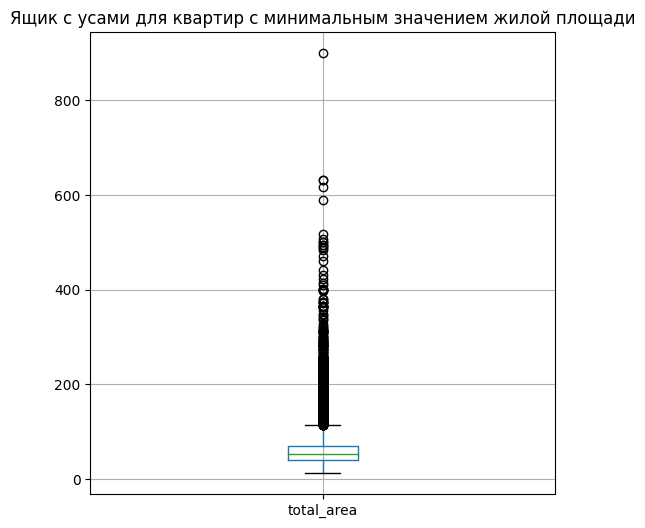

In [25]:
# отображение диаграммы ящик с усами для квартир с минимальным значением жилой площади
data.boxplot(column='total_area', figsize=(6, 6), grid=True)
plt.title('Ящик с усами для квартир с минимальным значением жилой площади')
plt.show()

In [26]:
# подсчет количества квартир с аномально высокими значениями общей площади
data.query('total_area > 250')['total_area'].count()

111

In [27]:
# подсчет количества квартир с аномально низкими значениями общей площади
data.query('total_area < 23')['total_area'].count()

88

In [28]:
# определение показателей для квартир с аномально высокими значениями общей площади
data.query('total_area > 250').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
155,8,96000000,317.0,2017-07-07,4,3.5,3,183.0,3,True,...,NaN,1,санкт-петербург,22673.0,1771.0,2,508.0,3,366.0,62.0
464,15,66571000,280.3,2015-06-11,6,5.2,8,159.5,7,True,...,21.1,0,санкт-петербург,26316.0,6655.0,3,187.0,1,616.0,578.0
581,20,65000000,365.0,2019-03-18,7,2.9,7,NaN,7,True,...,NaN,0,санкт-петербург,19827.0,1690.0,3,378.0,3,58.0,NaN
660,3,49950000,483.9,2017-10-04,7,3.2,6,312.5,4,True,...,26.4,0,санкт-петербург,23079.0,945.0,3,461.0,3,22.0,391.0
793,20,135000000,310.0,2018-05-22,4,3.3,5,250.0,2,True,...,50.0,0,санкт-петербург,34159.0,7251.0,2,295.0,3,190.0,342.0


In [29]:
# определение показателей для квартир с аномально низкими значениями общей площади
data.query('total_area < 23').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
114,5,4000000,21.40,2019-02-07,1,2.9,8,8.30,7,True,...,6.3,0,санкт-петербург,27089.0,5791.0,2,488.0,1,286.0,NaN
716,5,1500000,17.00,2017-06-07,0,2.7,9,12.00,1,True,...,NaN,0,поселок городского типа шушары,18654.0,29846.0,0,NaN,0,NaN,40.0
1194,14,2520000,22.70,2018-08-31,1,NaN,14,13.50,5,True,...,NaN,0,санкт-петербург,22735.0,11907.0,1,1065.0,1,484.0,7.0
1574,0,2200000,22.00,2017-11-03,0,NaN,18,15.00,16,True,...,NaN,1,деревня кудрово,NaN,NaN,0,NaN,0,NaN,81.0
1588,3,1900000,21.89,2018-11-01,1,NaN,19,10.93,17,True,...,NaN,0,поселок городского типа бугры,NaN,NaN,0,NaN,0,NaN,22.0


**Вывод**  
Высокие значения общей площади допустимы, также как и высоки значения комнатности, поскольку данные квартиры могут занимать этаж или несколько. Но площадь более 250 кв. м. выглядит уже странно. Тем более их не такое большое количество. Также слишком низкие площади квартир (менее 23 кв. м.) кажутся неправдоподобными.

**Вывод**  
Выявленные аномалии для проведения корректировок:  
1) для квартир с аномально низкой высотой потолков необходио заменить значения на медианные, поскольку значения ниже 2.5 не могут существовать (СП 54.13330.2011 Здания жилые многоквартирные);  
2) для квартир с аномально высокой высотой потолков, которые могут иметь вещественные значения, необходио заменить значения, поделив значения на 10;  
3) квартиры с аномально высокой высотой потолков удаляем;  
4) незаполненные значения площади кухни присущи только студиям, таким образом пропущенные значения можно заменить на 0;  
5) строки с аномальными значениями жилой площади лучше убрать, поскольку такие значения для представленных квартирностей (студия, 1-3 комнаты) невозможны;     
6) строки с аномальными значениями площади кухни необходио заменить значения на минимально допустимые, поскольку значения меньше 5 не могут существовать (СП 54.13330.2011 Здания жилые многоквартирные);   
7) значения общей площади свыше 250 кв. м. и менее 23 кв. м. удаляем.

In [30]:
# замена значений на медианные для квартир с аномально низкой высотой потолков (значения из mean)
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.77

In [31]:
# исправление высоты потолков для квартир с аномально высокой высотой потолков, которые могут иметь вещественные значения
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] = data['ceiling_height'] / 10

In [32]:
# незаполненную площадь кухни заменим на 0
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [33]:
# удаление квартир с аномально высокой высотой потолков
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index, inplace=True)

In [34]:
# незаполненную высоту потолков заменим на медианное значение (значение из mean)
data['ceiling_height'] = data['ceiling_height'].fillna(2.77)

In [35]:
# удаление квартир с аномальными значениями жилой площади
data.drop(index=data.query('living_area < 5').index, inplace=True)

In [36]:
# исправление площади кухни для квартир с аномальными значениями площади кухни
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = 5.00

In [37]:
# удаление квартир с аномальными значениями общей площади (свяше 250 кв. м.)
data.drop(index=data.query('total_area > 250').index, inplace=True)

In [38]:
# удаление квартир с аномальными значениями общей площади (менее 23 кв. м.)
data.drop(index=data.query('total_area < 23').index, inplace=True)

In [39]:
data.describe() # числовое описание данных для проверки изменений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
count,23315.000000,2.331500e+04,23315.000000,23315,23315.000000,23315.000000,23315.000000,21490.000000,23315.000000,23315.000000,23315.000000,17846.000000,17866.00000,23315.000000,7912.000000,23315.000000,8899.000000,20181.000000
mean,9.875016,6.183779e+06,59.050380,2017-11-10 18:23:42.088784128,2.055758,2.739355,10.699378,33.789322,5.882736,9.957798,0.595925,28829.627087,14261.51265,0.464980,491.240774,0.585803,519.239465,180.314900
min,0.000000,1.219000e+04,23.000000,2014-11-27 00:00:00,0.000000,2.500000,1.000000,5.400000,1.000000,5.000000,0.000000,0.000000,181.00000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.430000e+06,40.000000,2017-05-16 00:00:00,1.000000,2.600000,5.000000,18.600000,2.000000,6.400000,0.000000,18522.000000,9393.00000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000e+06,52.000000,2017-12-13 00:00:00,2.000000,2.770000,9.000000,30.000000,4.000000,9.000000,0.000000,26807.500000,13145.00000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.700000e+06,69.000000,2018-08-27 00:00:00,3.000000,2.770000,16.000000,42.100000,8.000000,11.400000,1.000000,37347.000000,16315.75000,1.000000,612.000000,1.000000,732.000000,230.000000
max,50.000000,3.300000e+08,250.000000,2019-05-03 00:00:00,14.000000,4.000000,60.000000,220.000000,33.000000,107.000000,5.000000,84869.000000,65968.00000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.673798,6.981038e+06,28.743188,NaN,1.026490,0.199783,6.596750,18.848302,4.871927,5.510746,0.961519,12670.428953,8607.99505,0.743914,342.390321,0.880700,278.004725,219.071904


**Вывод**  
Можно сделать вывод, что в данных были как ошибочные значения, допушенные из-за человеческого фактора, неверно указанная размерность данных, а также невыгрузившиеся картографические значения.

## Добавление цены одного квадратного метра <a id="new_m"></a> 

In [40]:
data['price_of_one_square_meter'] = data['last_price'] / data['total_area'] # рассчет цены одного кв. м.

# приведение цены одного кв. м. к целому числу
data['price_of_one_square_meter'] = data['price_of_one_square_meter'].astype('int64')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_of_one_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000,40.4,2018-12-04,1,2.77,11,18.6,1,True,...,2,поселок городского типа шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920
2,10,5196000,56.0,2015-08-20,2,2.77,5,34.3,4,True,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,0,64900000,159.0,2015-07-24,3,2.77,14,NaN,9,True,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000


## Добавление дня недели публикации объявления <a id="new_d"></a> 

In [41]:
# 0 — понедельник, 1 — вторник и так далее
data['day_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).day
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_of_one_square_meter,day_of_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,7
1,7,3350000,40.4,2018-12-04,1,2.77,11,18.6,1,True,...,поселок городского типа шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,4
2,10,5196000,56.0,2015-08-20,2,2.77,5,34.3,4,True,...,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,20
3,0,64900000,159.0,2015-07-24,3,2.77,14,NaN,9,True,...,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,24
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,19


## Добавление месяца недели публикации объявления <a id="new_mon"></a> 

In [42]:
data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_of_one_square_meter,day_of_publication,month_of_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,7,3
1,7,3350000,40.4,2018-12-04,1,2.77,11,18.6,1,True,...,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,4,12
2,10,5196000,56.0,2015-08-20,2,2.77,5,34.3,4,True,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,20,8
3,0,64900000,159.0,2015-07-24,3,2.77,14,NaN,9,True,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,24,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,19,6


## Добавление года недели публикации объявления <a id="new_y"></a> 

In [43]:
data['year_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_of_one_square_meter,day_of_publication,month_of_publication,year_of_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,16028.0,1,482.0,2,755.0,NaN,120370,7,3,2019
1,7,3350000,40.4,2018-12-04,1,2.77,11,18.6,1,True,...,18603.0,0,NaN,0,NaN,81.0,82920,4,12,2018
2,10,5196000,56.0,2015-08-20,2,2.77,5,34.3,4,True,...,13933.0,1,90.0,2,574.0,558.0,92785,20,8,2015
3,0,64900000,159.0,2015-07-24,3,2.77,14,NaN,9,True,...,6800.0,2,84.0,3,234.0,424.0,408176,24,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,8098.0,2,112.0,1,48.0,121.0,100000,19,6,2018


## Добавление типа этажа квартиры <a id="new_f"></a> 

In [44]:
# значения — «первый», «последний», «другой»
# создание функции для добавления типа этажа
def floor_type_f(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type_f, axis=1)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_of_one_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,1,482.0,2,755.0,NaN,120370,7,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.77,11,18.6,1,True,...,0,NaN,0,NaN,81.0,82920,4,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.77,5,34.3,4,True,...,1,90.0,2,574.0,558.0,92785,20,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.77,14,NaN,9,True,...,2,84.0,3,234.0,424.0,408176,24,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,2,112.0,1,48.0,121.0,100000,19,6,2018,другой


## Добавление расстояния до центра города в километрах <a id="new_way"></a> 

In [45]:
# рассчет расстояния до центра города в километрах 
data['distance'] = round(data['city_centers_nearest'] / 1000)
data.head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_of_one_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_type,distance
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,482.0,2,755.0,NaN,120370,7,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.77,11,18.60,1,True,...,NaN,0,NaN,81.0,82920,4,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.77,5,34.30,4,True,...,90.0,2,574.0,558.0,92785,20,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.77,14,NaN,9,True,...,84.0,3,234.0,424.0,408176,24,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,112.0,1,48.0,121.0,100000,19,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.77,12,14.40,5,True,...,NaN,0,NaN,55.0,95065,10,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.77,26,10.60,6,True,...,NaN,0,NaN,155.0,99195,2,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.77,24,NaN,22,True,...,NaN,0,NaN,NaN,110544,18,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.77,27,15.43,26,True,...,NaN,0,NaN,189.0,87454,23,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,NaN,0,NaN,289.0,88524,26,2,2017,другой,15.0


## Исследовательский анализ данных <a id="reseach"></a> 

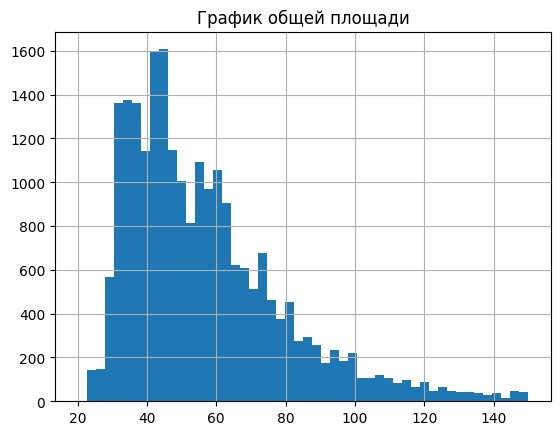

In [46]:
# изучение гистограмм для каждого выбранного параметра
data.hist('total_area', grid=True, range=(20,150), bins=50)
plt.title('График общей площади')
plt.show()

In [47]:
# числовое описание данных для общей площади
data['total_area'].describe() 

count    23315.000000
mean        59.050380
std         28.743188
min         23.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        250.000000
Name: total_area, dtype: float64

**Вывод**  
Можно сделать вывод, что наибольшее количество квартир приходится на диапазон общей площади от 30-100 кв. м. Наименьшее количество квартир приходится на квартиры с площадью свыше 100 кв. м.у и менее 30 кв. м. Площади более 100 кв. м., скорее всего, относятся к элитной недвижимости.

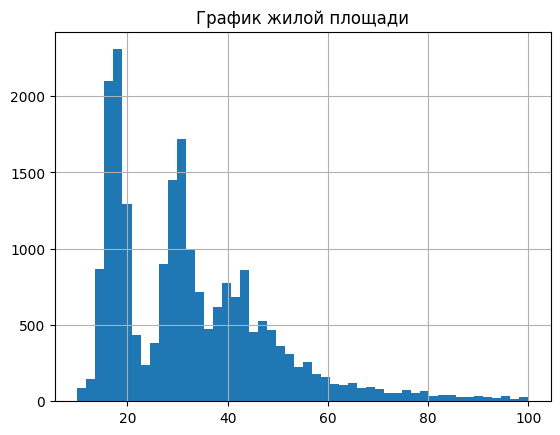

In [48]:
# гистрограмма для жилой площади
data.hist('living_area', grid=True, range=(10,100), bins=50)
plt.title('График жилой площади')
plt.show()

In [49]:
# числовое описание данных для общей площади
data['living_area'].describe() 

count    21490.000000
mean        33.789322
std         18.848302
min          5.400000
25%         18.600000
50%         30.000000
75%         42.100000
max        220.000000
Name: living_area, dtype: float64

**Вывод**  
По гистограмме видно, что существует два пика (18 кв. м. и 30 кв. м.), но и резкий провал между ними. О причине такого провала нельзя сказать однозначно.

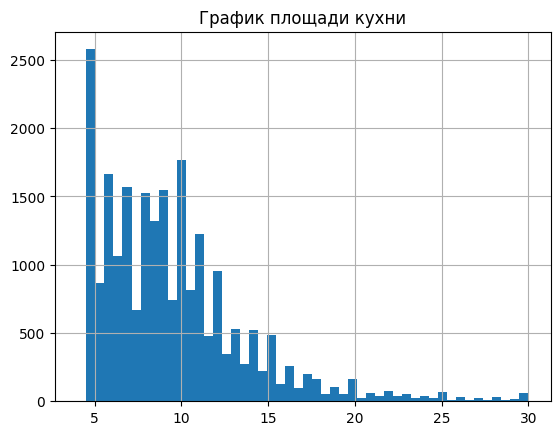

In [50]:
# гистрограмма для площади кухни
data.hist('kitchen_area', grid=True, range=(4,30), bins=50)
plt.title('График площади кухни')
plt.show()

In [51]:
# числовое описание данных для общей площади
data['kitchen_area'].describe() 

count    23315.000000
mean         9.957798
std          5.510746
min          5.000000
25%          6.400000
50%          9.000000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

**Вывод**  
Можно сделать вывод, что пик, приходящийся на минимальную площадь кухни, объясним тем, что огромное количество квартир (в прошлом) строили с маленькими кухнями (например, хрущевка, сталинка).

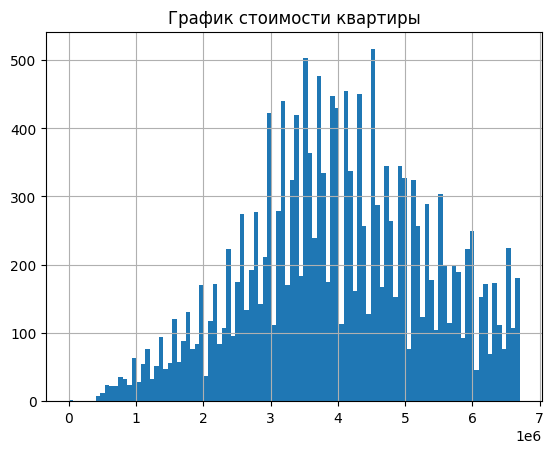

In [52]:
# гистрограмма для цены объекта
data.hist('last_price', grid=True, range=(0, 6.700000e+06), bins=100)
plt.title('График стоимости квартиры')
plt.show()

In [53]:
# числовое описание данных для цены объекта
data['last_price'].describe() 

count    2.331500e+04
mean     6.183779e+06
std      6.981038e+06
min      1.219000e+04
25%      3.430000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

**Вывод**  
Существуют пиковые значения, но это, скорее всего, относится к элитной недвижиморсти.

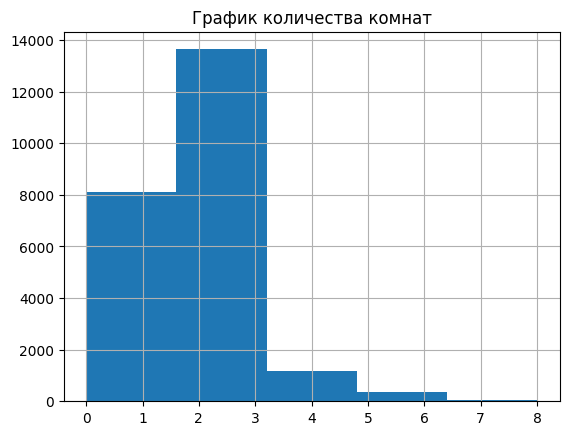

In [54]:
# гистрограмма для количества комнат
data.hist('rooms', grid=True, range=(0, 8), bins=5)
plt.title('График количества комнат')
plt.show()

In [55]:
# числовое описание данных для количества комнат
data['rooms'].describe() 

count    23315.000000
mean         2.055758
std          1.026490
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

**Вывод**  
Можно сделать вывод, что в наибольшем количестве квартир 2-3 комнаты, количество квартир-студий занимает среднее значение, а вот наименьшее количество квартир с 4+ комнатами.

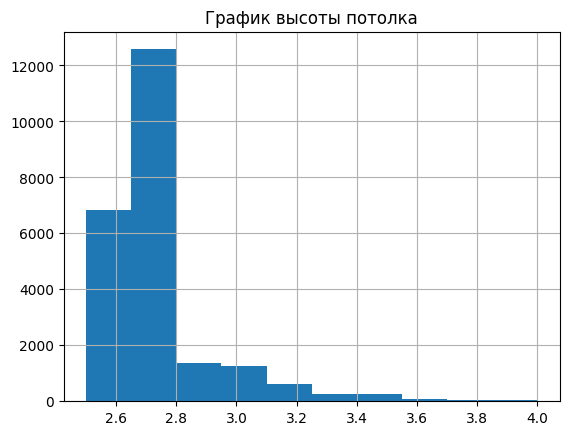

In [56]:
# гистрограмма для высоты потолков
data.hist('ceiling_height', grid=True, range=(2.5, 4), bins=10)
plt.title('График высоты потолка')
plt.show()

In [57]:
# числовое описание данных для высоты потолков
data['ceiling_height'].describe() 

count    23315.000000
mean         2.739355
std          0.199783
min          2.500000
25%          2.600000
50%          2.770000
75%          2.770000
max          4.000000
Name: ceiling_height, dtype: float64

**Вывод**  
Можно сделать вывод, что показатель пика высоты потолков, который приходится на 2.7, вполне логичен, потому что самой распространенной высотой потолков в квартире яввляется 2.7.

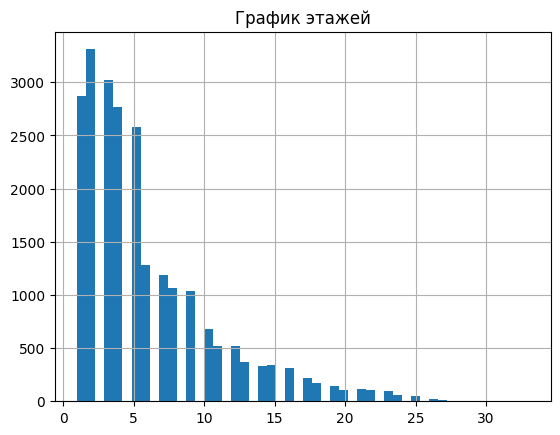

In [58]:
# гистрограмма для этажа квартиры
data.hist('floor', grid=True, range=(1, 33), bins=50)
plt.title('График этажей')
plt.show()

In [59]:
# числовое описание данных для этажа квартиры
data['floor'].describe() 

count    23315.000000
mean         5.882736
std          4.871927
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Вывод**  
Результаты данной гистограммы, логичны и ожидаемы. Пик приходится диапазон этажностей 2-5. Данный факт соответствует действительности, посколько самыми распространенными видами домов являются пятиэтажные дома.

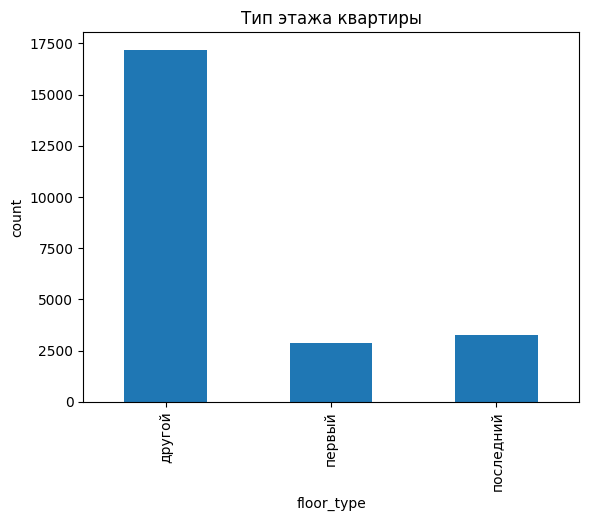

In [60]:
# гистрограмма для типа этажа квартиры
data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'count', title = 'Тип этажа квартиры')
plt.show()

**Вывод**  
Результаты данной гистограммы, также, логичны и ожидаемы. Наименьшее количество квартир приходится на первый и последнние этажи, а наибольшее количество квартир приходится на тип "другой".

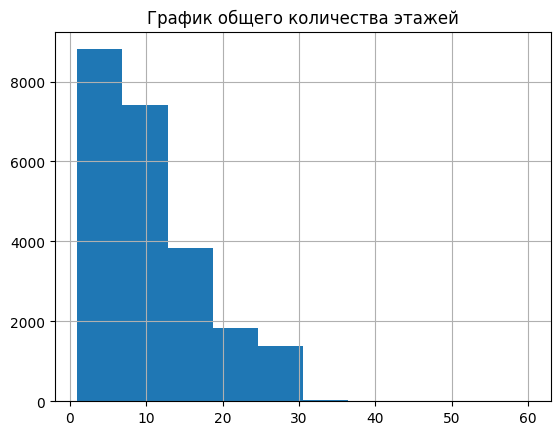

In [61]:
# гистрограмма для количества этажей квартиры
data.hist('floors_total', grid=True, range=(1, 60), bins=10)
plt.title('График общего количества этажей')
plt.show()

In [62]:
# числовое описание данных для количества этажей квартиры
data['floors_total'].describe() 

count    23315.000000
mean        10.699378
std          6.596750
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Вывод**  
Результаты данной гистограммы, подтверждают данные "гистограммы для этажа квартиры". Данная гистограмма показывает, что наибольшее распространение получил диапазон этажей от 0-10 этажей.

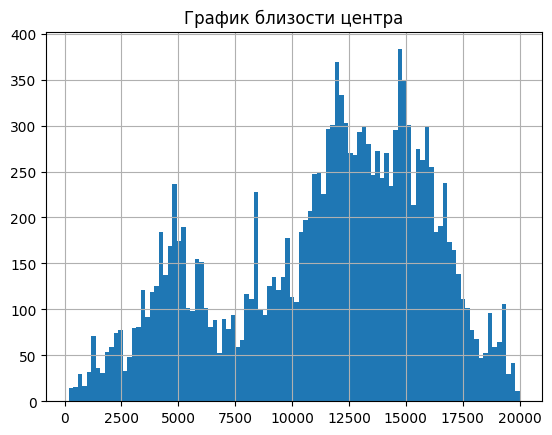

In [63]:
# гистрограмма для расстояния до центра города в метрах
data.hist('city_centers_nearest', grid=True, range=(181, 20000), bins=100)
plt.title('График близости центра')
plt.show()

In [64]:
# числовое описание данных для расстояния до центра города в метрах
data['city_centers_nearest'].describe() 

count    17866.00000
mean     14261.51265
std       8607.99505
min        181.00000
25%       9393.00000
50%      13145.00000
75%      16315.75000
max      65968.00000
Name: city_centers_nearest, dtype: float64

**Вывод**  
На гистограмме видно два пика, которые приходятся на диапазон больших и маленьких значений: 15 км. и 5 км.

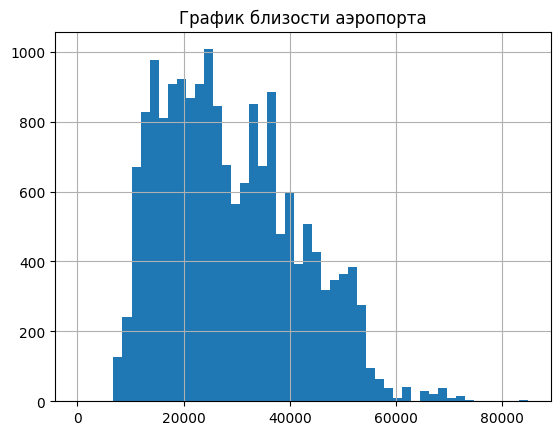

In [65]:
# гистрограмма для расстояния до ближайшего аэропорта
data.hist('airports_nearest', bins=50)
plt.title('График близости аэропорта')
plt.show()

In [66]:
# числовое описание данных для расстояния до ближайшего аэропорта
data['airports_nearest'].describe() 

count    17846.000000
mean     28829.627087
std      12670.428953
min          0.000000
25%      18522.000000
50%      26807.500000
75%      37347.000000
max      84869.000000
Name: airports_nearest, dtype: float64

**Вывод**  
Большинство квартир располагаются ближе 7 км. от аэропорта.

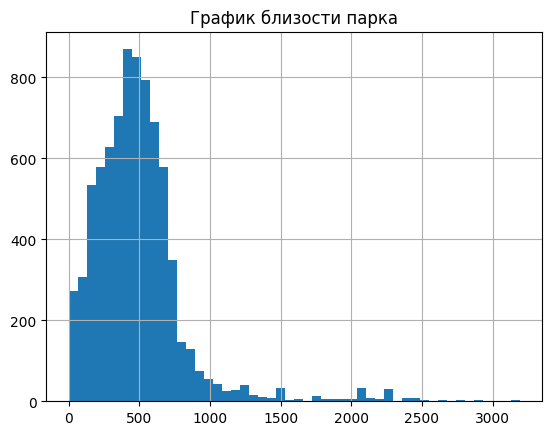

In [67]:
# гистрограмма для расстояния до ближайшего парка
data.hist('parks_nearest', bins=50)
plt.title('График близости парка')
plt.show()

In [68]:
# числовое описание данных для расстояния до ближайшего парка
data['parks_nearest'].describe() 

count    7912.000000
mean      491.240774
std       342.390321
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Вывод**  
Большинство квартир располагаются ближе 1 км. от парка. Также есть квартиры, которые расположены в непосредственной близости от парка.

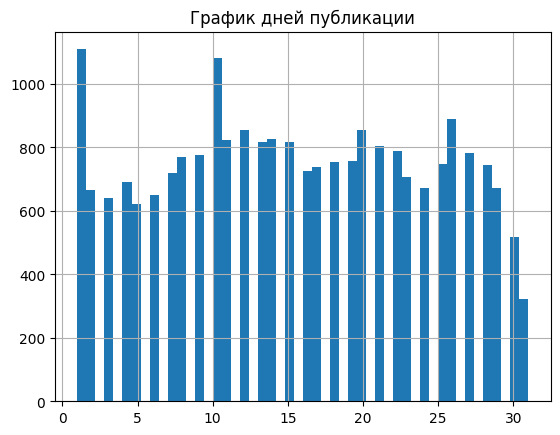

In [69]:
# гистрограмма для дня публикации объявления
data.hist('day_of_publication', bins=50)
plt.title('График дней публикации')
plt.show()

**Вывод**  
Большинство объявлений публиковались 1 и 10 числа месяца.

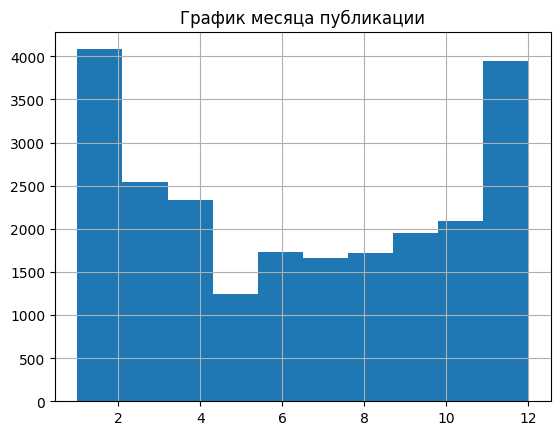

In [70]:
# гистрограмма для месяца публикации объявления
data.hist('month_of_publication', bins=10)
plt.title('График месяца публикации')
plt.show()

**Вывод**  
Большинство объявлений публиковались в январе и декабре, а в мае замечен значительный спад.

## Изучение быстроты продажи квартиры <a id="sell"></a> 

In [71]:
# числовое описание данных для срока размещения объявления (дни)
data['days_exposition'].describe()

count    20181.000000
mean       180.314900
std        219.071904
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

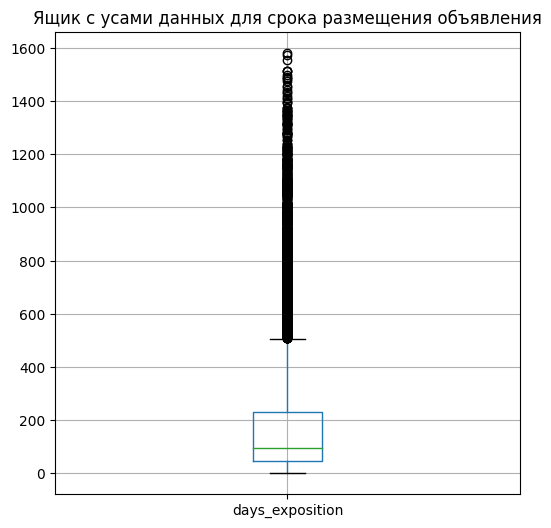

In [72]:
# Отображение диаграммы ящик с усами данных для срока размещения объявления (дни) 
data.boxplot(column='days_exposition', figsize=(6, 6), grid=True)
plt.title('Ящик с усами данных для срока размещения объявления')
plt.show()

**Вывод**  
Значения выше 250-300 можно убрать, поскольку данные значения выбиваются, являются редкими. Данные оказывают влияние на средний показатель срока размещения объявления.

In [73]:
# удаление данных, оказывающих влияние на средний показатель срока размещения объявления (дни)
data.drop(index=data.query('days_exposition > 250').index, inplace=True)

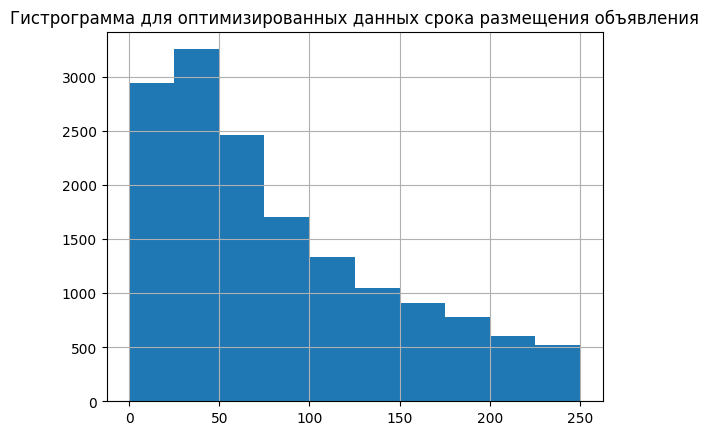

In [74]:
# гистрограмма для оптимизированных данных срока размещения объявления (дни)
data.hist('days_exposition', range=(0, 250), bins=10)
plt.title('Гистрограмма для оптимизированных данных срока размещения объявления')
plt.show()

In [75]:
# среднее и медиана для оптимизированных данных срока размещения объявления
print('Медианное значение:', round(data['days_exposition'].median()))
print('Среднее значение:', round(data['days_exposition'].mean()))

Медианное значение: 63
Среднее значение: 83


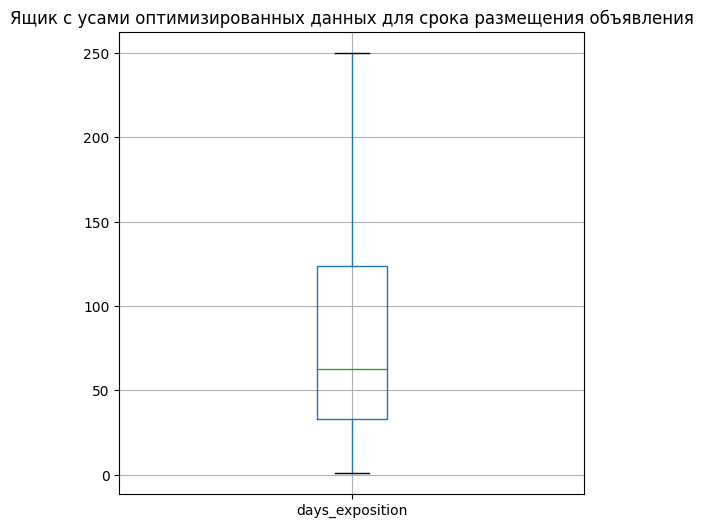

In [76]:
# Отображение диаграммы ящик с усами оптимизированных данных для срока размещения объявления (дни)
data.boxplot(column='days_exposition', figsize=(6, 6), grid=True)
plt.title('Ящик с усами оптимизированных данных для срока размещения объявления')
plt.show()

In [77]:
# числовое описание данных для срока размещения объявления (дни)
data['days_exposition'].describe()

count    15527.000000
mean        83.425774
std         63.715242
min          1.000000
25%         33.000000
50%         63.000000
75%        124.000000
max        250.000000
Name: days_exposition, dtype: float64

**Вывод**  
Можно сделать вывод, что среднее время продажи квартиры составляет 83 дня, однако при медианном значении — 63 дня. На основании числового описания данных и графика можно сделать вывод, что быстрыми продажами можно считать продажи за 33 дня, а необычно долгими — 124 дня.

## Определение степени влияния различных факторов на стоимость квартиры <a id="fact"></a> 

In [78]:
# Рассчет корреляции Пирсона для общей площади
data['last_price'].corr(data['total_area'])

0.6551249862077455

In [79]:
# Рассчет корреляции Пирсона для жилой площади
data['last_price'].corr(data['living_area'])

0.5572674966460338

In [80]:
# Рассчет корреляции Пирсона для площади кухни
data['last_price'].corr(data['kitchen_area'])

0.47102012244142466

In [81]:
# Рассчет корреляции Пирсона для количества комнат
data['last_price'].corr(data['rooms'])

0.38399299531924863

In [82]:
# Рассчет корреляции Пирсона для дня публикации
data['last_price'].corr(data['day_of_publication'])

-0.0010013074906747024

In [83]:
# Рассчет корреляции Пирсона для месяца публикации
data['last_price'].corr(data['month_of_publication'])

-0.00018550912510048711

In [84]:
# Рассчет корреляции Пирсона для года публикации
data['last_price'].corr(data['year_of_publication'])

-0.005585650265611503

**Вывод**  
Из рассчетов видно, что наибольшая корреляция заметна между стоимостью и общей площадью квартиры, чем выше площадь квартиры, тем выше стоимость. Схожая зависимость, но в меньшем значении, заметная между ценой и жилой площадью, площадью кухни и количеством комнат. Наименьшая прямая зависимость видна между ценой и количеством комнат. Отрицательная корреляция видна между ценой и временем публикации (днем, месяцем, годом). 

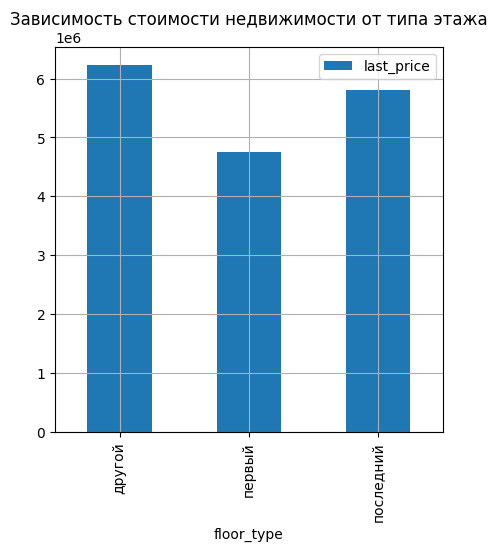

In [85]:
# сводная таблица зависимости стоимости недвижимости от типа этажа
data.pivot_table(index='floor_type',values='last_price').plot(grid=True, kind='bar', title = 'Зависимость стоимости недвижимости от типа этажа', figsize=(5, 5)) 
plt.show()

**Вывод**  
Зависимость цены от этажа квартиры также видна на графике. Меньшую стоимость составляют квартиры, которые находятся на 1 этаже, а наивысшая стоимость квартир находится ни на первом, ни на последнем этажах. Однако стоимость квартир высока и на последних этажах, это может быть связано с тем, что на последних этажах, обычно, хороший вид из окна и, соответственно, нет соседей сверху. Данные факты, скорее всего, привлекают людей.

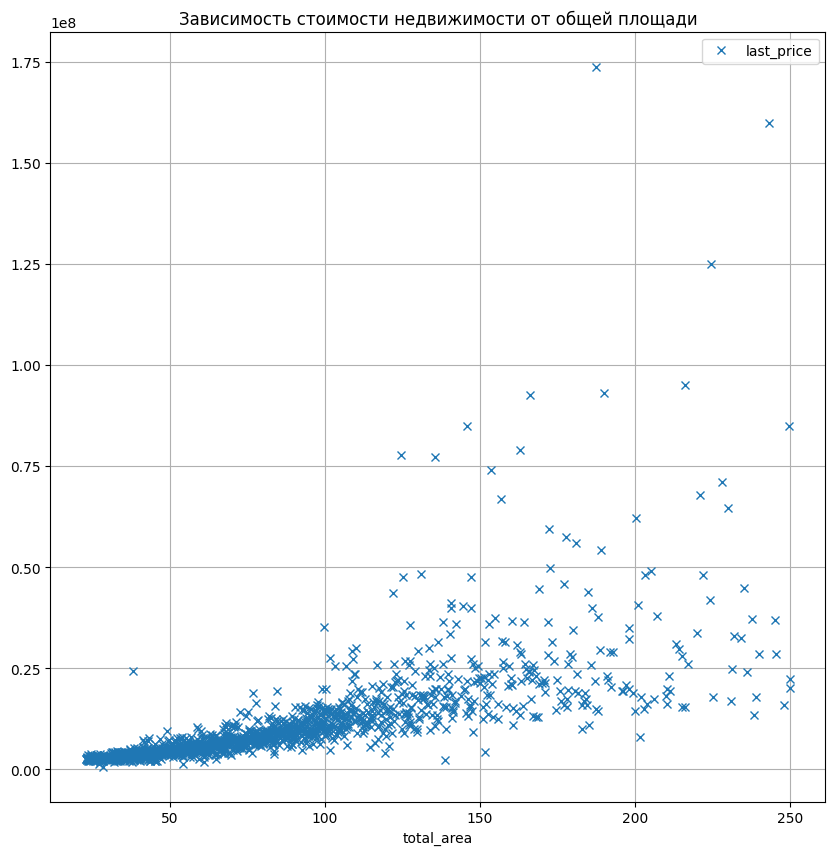

In [86]:
# зависимость стоимости недвижимости от общей площади
data.pivot_table(index='total_area',values='last_price').plot(grid=True, style='x', title = 'Зависимость стоимости недвижимости от общей площади', figsize=(10, 10))
plt.show()

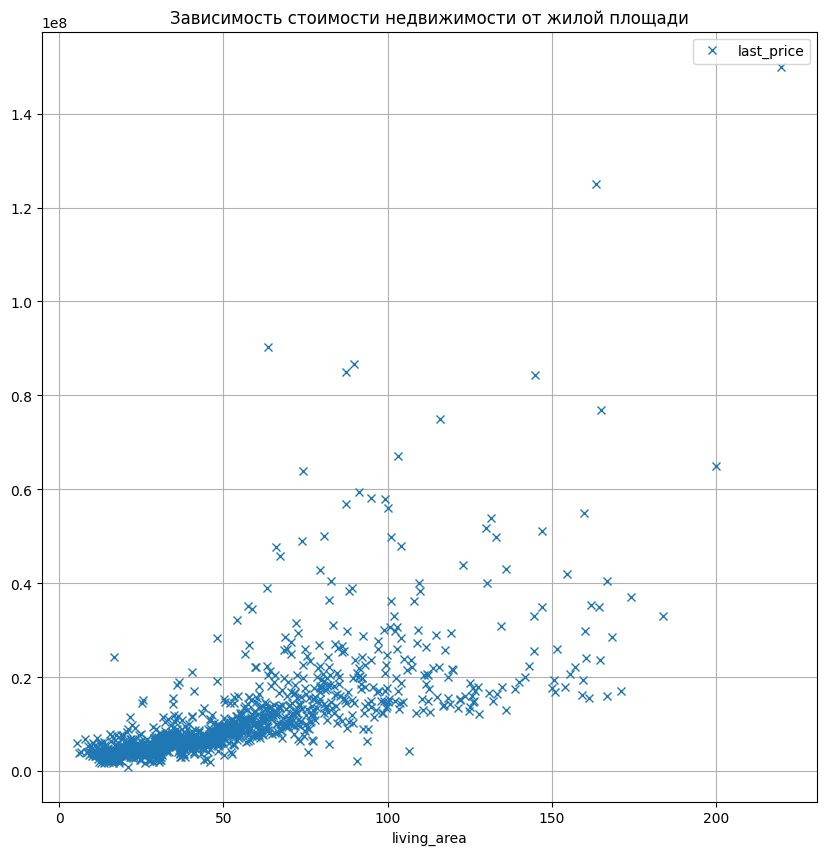

In [87]:
# зависимость стоимости недвижимости от жилой площади
data.pivot_table(index='living_area',values='last_price').plot(grid=True, style='x', title = 'Зависимость стоимости недвижимости от жилой площади', figsize=(10, 10))
plt.show()

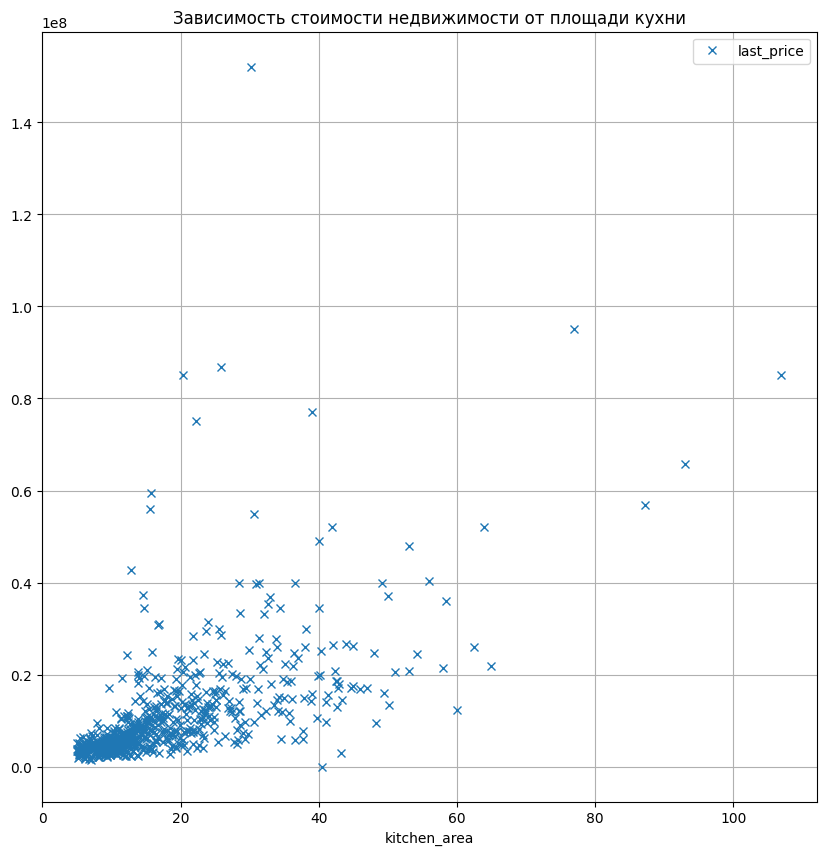

In [88]:
# зависимость стоимости недвижимости от площади кухни
data.pivot_table(index='kitchen_area',values='last_price').plot(grid=True, style='x', title = 'Зависимость стоимости недвижимости от площади кухни', figsize=(10, 10))
plt.show()

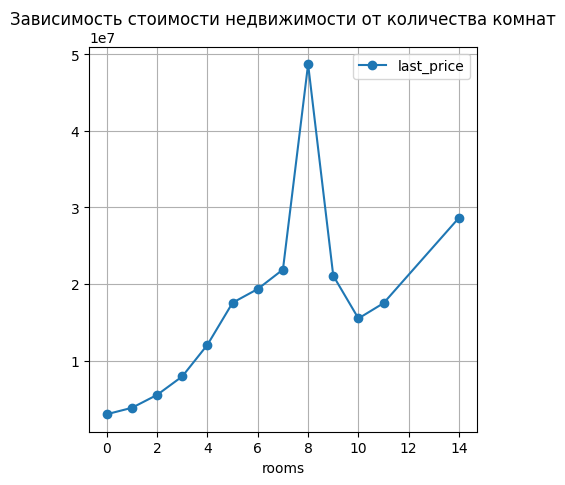

In [89]:
# зависимость стоимости недвижимости от этажа
data.pivot_table(index='rooms',values='last_price').plot(grid=True, style='o-', title = 'Зависимость стоимости недвижимости от количества комнат', figsize=(5, 5))
plt.show()

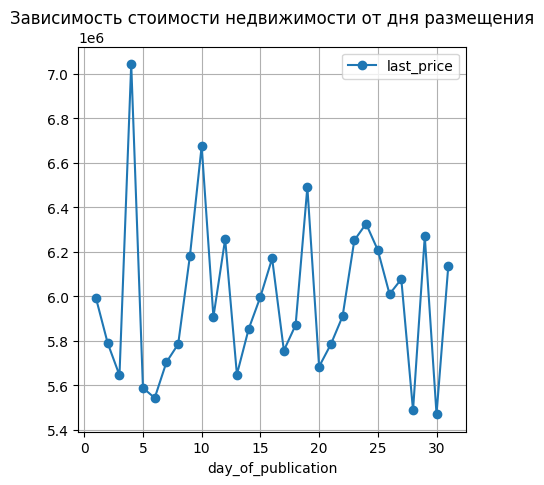

In [90]:
# зависимость стоимости недвижимости от дня размещения
data.pivot_table(index='day_of_publication',values='last_price').plot(grid=True, style='o-', title = 'Зависимость стоимости недвижимости от дня размещения', figsize=(5, 5))
plt.show()

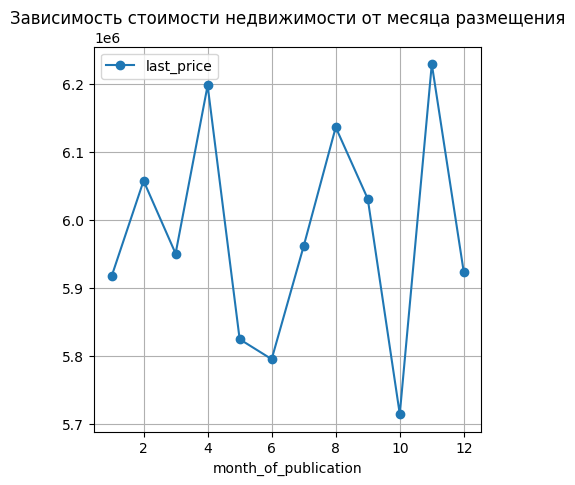

In [91]:
# зависимость стоимости недвижимости от месяца размещения
data.pivot_table(index='month_of_publication',values='last_price').plot(grid=True, style='o-', title = 'Зависимость стоимости недвижимости от месяца размещения', figsize=(5, 5))
plt.show()

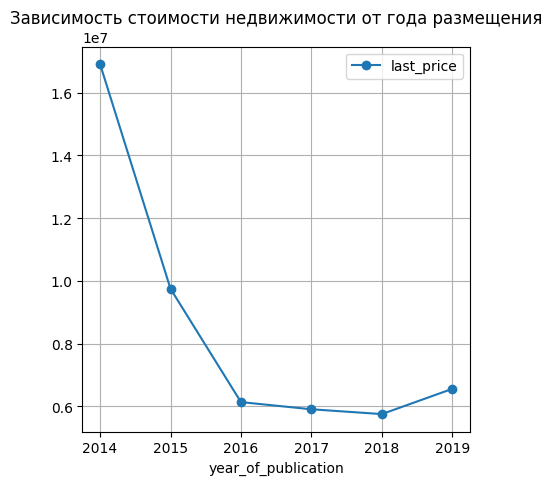

In [92]:
# зависимость стоимости недвижимости от года размещения
data.pivot_table(index='year_of_publication',values='last_price').plot(grid=True, style='o-', title = 'Зависимость стоимости недвижимости от года размещения', figsize=(5, 5))
plt.show()

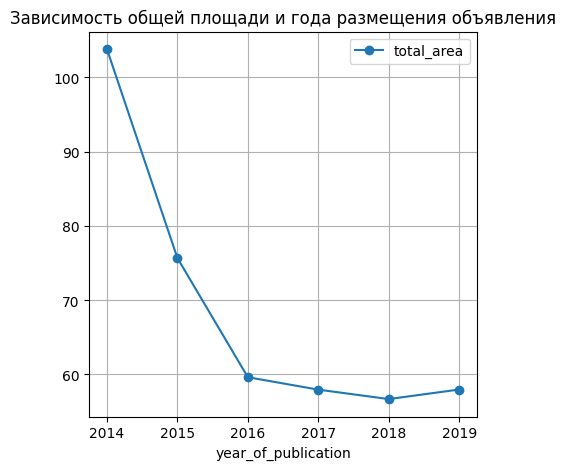

In [93]:
# зависимость общей площади и года размещения объявления
data.pivot_table(index='year_of_publication',values='total_area').plot(grid=True, style='o-', title = 'Зависимость общей площади и года размещения объявления', figsize=(5, 5))
plt.show()

**Вывод**  
Можно сделать вывод, что больше всего на цену влияют такие факторы, как общая и жилая площади, площадь кухни и количество комнат. На стоимость также оказывают влияние этаж расположения недвижимости: квартиры между 1 и последним этажом имеют наиболее высокую стоимость, нежели чем недвижимость на первом этаже. Наиболее высокая корреляция заметна между ценой и общей площадью квартиры (чем выше площадь квартиры, тем выше стоимость).  
Таким образом, с учетом того, что наблюдается уменьшение метража общей площади недвижимости, то уменьшается и её стоимость, поскольку их зависимость высока. На основании динамики общей площади недвижимости, можно сделать вывод, что с течением времени уменьшалась общая площадь недвижимости, соответственно упала и стоимость.

## Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений <a id="check"></a> 

In [94]:
data.groupby('locality_name').agg({'price_of_one_square_meter':'count', 'last_price':'median'}) \
    .sort_values(by = 'price_of_one_square_meter', ascending = False) \
    .head(10)

,price_of_one_square_meter,last_price
locality_name,,
санкт-петербург,12360,5400000.0
поселок городского типа мурино,454,3400000.0
поселок городского типа шушары,362,3995000.0
всеволожск,304,3500000.0
колпино,285,3600000.0
пушкин,278,5100000.0
поселок городского типа парголово,266,4200000.0
гатчина,238,3070000.0
деревня кудрово,225,3800000.0


**Вывод**  
Можно сделать вывод, что наибольшая стоимость квадратного метра в Санкт-Петербурге, а наименьшая стоимость квадратного метра в выборке из 10 городов — в Выборге. Следующими по стоимости квадратного метра после Санкт-Петербурга идут Мурино, Шушары, Всеволжск и т.д., данные местности находятся в непосредственной близости от Санкт-Петербурга. Однако следует заметить, что разрыв между стоимостью кв. м. в Санкт-Петербурге в разы выше нежели чем в близлежащих населенных пунтах.

## Подсчет средней цены одного киллометра до центра Санкт-Петербурга <a id="check_1"></a> 

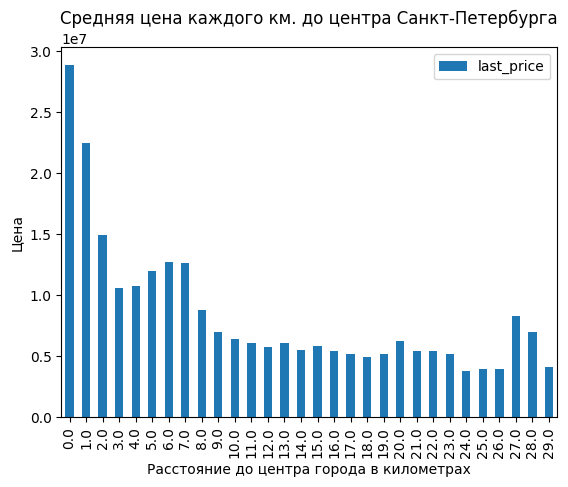

In [95]:
# гистограмма средней цены каждого километра до центра Санкт-Петербурга (медианное значение)
city_spb_km = data[data['locality_name']=='санкт-петербург'].pivot_table(index='distance', values='last_price', aggfunc='mean')\
    .plot(kind='bar', title = 'Средняя цена каждого км. до центра Санкт-Петербурга')

plt.xlabel('Расстояние до центра города в километрах')
plt.ylabel('Цена')
plt.show()

**Вывод**  
Можно сделать вывод, что средняя цена за 1 км. наимного выше у недвижимости в непосредственном центре города (до 1 км). На расстоянии от 3-7 км. стоимость 1 км.сравнительно ниже, намного выгоднее. Стоимость 1 км. сокращается с отдалением от центра города от 8 км., однако на рассроянии 27 км. существует всплеск стоимости (возможно, на таком отдалении находится какой-то престижный микрорайон).

### Общий вывод <a id="done"></a> 

При проведении исследования были выполнены поставленные цели:  
1. обработаны и подготовлены данные для проведения анализа.  
2. посчитаны и добавлены в таблицу дополнительные данные для дальнейшего изучения.  
3. определены быстрые и долгие продажи недвижимости.  
4. проанализированны факторы, оказывающие наибольшее влияние на стоимость недвижимости.  
5. рассчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.  
6. определено каким образом стоимость объектов зависит от расстояния до центра города.  

На основании проведенного анализа, можно сделать вывод, что предоставленные данные нуждались в большом количестве исправлений и доработок. Это были и выбросы и пропущенные значения, а также неверно указанные данные, с неверной размерностью.  
По результатам исследования можно сделать вывод, что наибольшее количество квартир приходится на диапазон общей площади от 30-100 кв. м. Наименьшее количество квартир приходится на квартиры с площадью свыше 100 кв. м. и менее 30 кв. м. Площади более 100 кв. м., скорее всего, относятся к элитной недвижимости.  
Очень большое количество квартир продается с очень маленькими кухнями, что обусловлено тем, что огромное количество квартир (в прошлом) строили с маленькими кухнями (например, хрущевка, сталинка).  
Также в основном продаются квартиры с 2-3 комнатами, количество квартир-студий занимает среднее значение, а вот наименьшее количество квартир с 4+ комнатами.  
Наибольшее количество квартир приходится на не первые и не последние этажи, поскольку в настоящее время, практически, все первые этажи отданы под коммерческую недвижимость, а последние этажи, скорее, дуплексы, пентхаусы и т.д.  
Также, можно прийти к выводу, что большинство квартир находится не так далеко от аэропорта в данных городах, а расстоянии до 7 км. А также большинство квартир расположены в непосредственной близости от парков.  
Если делать вывод о скорости продажи недвижимости в Санкт-Петербурге и соседних населённых пунктах, то, быстрыми продажами можно считать продажи за 33 дня, а вот необычно долгими — 124 дня.  
На цену квартиры влияют большое количество факторов в разной степени. Наибольшее влияние оказывают общая площадь, жилая площадь, площадь кухни, количество комнат. Обратную зависимость можно наблюдать между ценой и временем публикации объявления (отрицательная корреляция). Наименьшая прямая зависимость видна между ценой и количеством комнат. Этаж расположения квартиры, также оказывает влияние на ее стоимость. Квартиры с наименьшей стоимостью расположены на 1 этаже, а вот наибольшую стоимость имеют квартиры расположенные между первым и последним этажами. На последнем этаже стоимость квартир выше, нежели, чем на первом. Это может быть обусловлено и видом из окна и большой площадью квартиры (например, дуплекс, пентхаус).  
Стоимость кв. м. в Санкт-Петербурге является наиболее высокой, нежели чем в соседних населенных пунктах. Наименьшая стоимость кв. м. выявлена в Выборге — наиболее удаленном населенном пункте от Санкт-Петербурга. Также заметно уменьшение стоимости 1 км. в зависимости от отдаления от центра Санкт-Петербурга. Таким образом, чем ближе находится квартира к центру Санкт-Петербурга, тем выше её цена. Однако, в настоящее время многие люди любят тишину и уединение и строят "элитную" недвижимость в дали от центра города. Данный факт заметен и в данном исследовании. На расстоянии 27 км. от центра Санкт-Петербурга выявлен всплеск стоимости недвижимости.